In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Roman\Documents\CleanData\NormByTreat\blasts1-BR1.csv").drop(columns=['PlateName','Count']).set_index(['Compound','Concentration'])
df.drop('DMSO',inplace=True)
df.dropna(axis=1, how='all',inplace=True)
df.head(10)

Cell 33342 Radial Mean   \
Compound Concentration                            
ATOR     10                            0.016966   
         30                            0.050294   
         100                           0.038086   
         300                           0.016247   
         1000                          0.034177   
         3000                          0.201267   
         10000                         0.634578   
         30000                         0.753169   
CERI     10                            0.059084   
         30                            0.152392   

                        Cell 33342 Radial Mean Ratio SER-Bright  \
Compound Concentration                                            
ATOR     10                                            0.009822   
         30                                            0.112758   
         100                                           0.061467   
         300                                           0.052347   
         1000                                          0.066115   
         3000                                          0.496341   
         10000                                         2.257406   
         30000                                         4.472453   
CERI     10                                            0.120736   
         30                                            0.419653   

                        Cell 33342 Radial Mean Ratio SER-Dark  \
Compound Concentration                                          
ATOR     10                                         -0.048480   
         30                                         -0.023298   
         100                                        -0.055380   
         300                                        -0.047630   
         1000                                        0.022583   
         3000                                       -0.038189   
         10000                                       0.017417   
         30000                                       0.235039   
CERI     10                                         -0.024075   
         30                                         -0.026165   

                        Cell 33342 Radial Mean Ratio SER-Edge  \
Compound Concentration                                          
ATOR     10                                         -0.050430   
         30                                         -0.012024   
         100                                        -0.041384   
         300                                        -0.026250   
         1000                                       -0.002137   
         3000                                       -0.035666   
         10000                                      -0.157812   
         30000                                      -0.115841   
CERI     10                                         -0.020903   
         30                                          0.015721   

                        Cell 33342 Radial Mean Ratio SER-Hole  \
Compound Concentration                                          
ATOR     10                                         -0.011758   
         30                                          0.052455   
         100                                         0.033280   
         300                                         0.025627   
         1000                                        0.086061   
         3000                                        0.277895   
         10000                                       1.123267   
         30000                                       2.024800   
CERI     10                                          0.095021   
         30                                          0.259009   

                        Cell 33342 Radial Mean Ratio SER-Ridge  \
Compound Concentration                                           
ATOR     10                                           0.017493   
         30                                           0.130478   

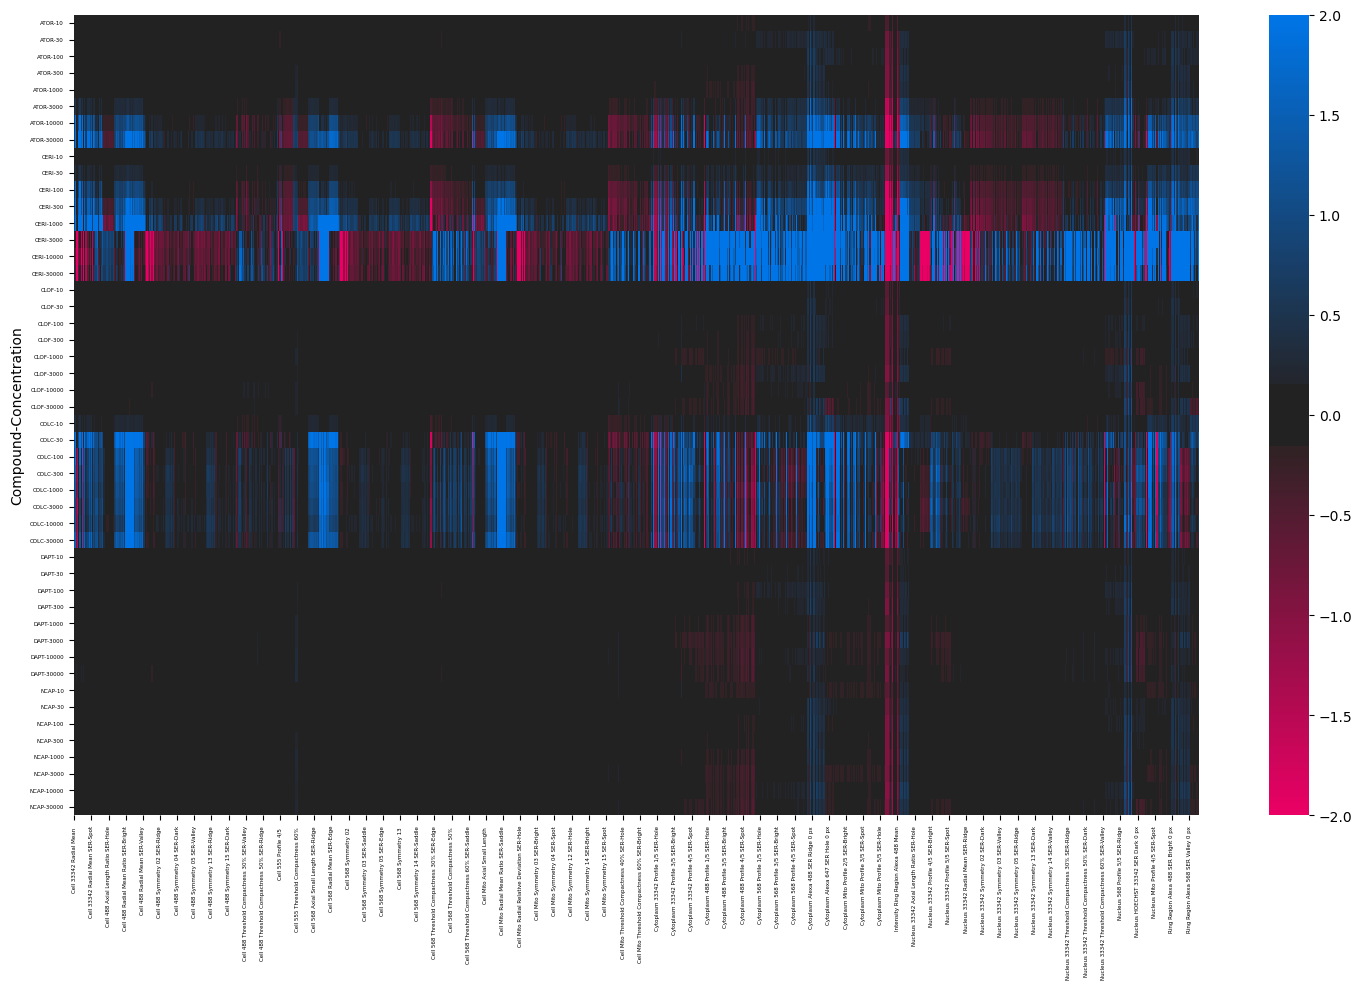

In [2]:
cmap = sns.diverging_palette(0, 255, sep=20, s=100, center='dark', as_cmap=True)
#cmap = sns.color_palette("icefire", as_cmap=True)
plt.figure(figsize = (15,10))
ax = sns.heatmap(df , cmap=cmap,xticklabels=15, yticklabels=1, cbar=True,center=0, vmin=-2, vmax=2)
ax.tick_params(labelsize=4)
#ax.vlines([8,16,24,32,40], ymin=0, ymax=len(df.T), color='white')

plt.tight_layout()
plt.show()

In [3]:
df.columns
cell_cols = [col for col in df.columns if 'Cell' in col]
cyto_cols = [col for col in df.columns if 'Cyto' in col]
nucl_cols = [col for col in df.columns if 'Nucl' in col]
memb_cols = [col for col in df.columns if 'Memb' in col]
ring_cols = [col for col in df.columns if 'Ring' in col]
print("Cytoplasm: "+str(len(cyto_cols))+
    "\nCell: "+ str(len(cell_cols))+
    "\nMembrane: "+ str(len(memb_cols))+
    "\nRing: "+ str(len(ring_cols))+
    "\nNucleus: "+ str(len(nucl_cols))+
    "\nTotal: "+ str(len(cyto_cols)+len(cell_cols)+len(memb_cols)+len(ring_cols)+len(nucl_cols))+ " features")

Cytoplasm: 207
Cell: 508
Membrane: 9
Ring: 27
Nucleus: 232
Total: 983 features


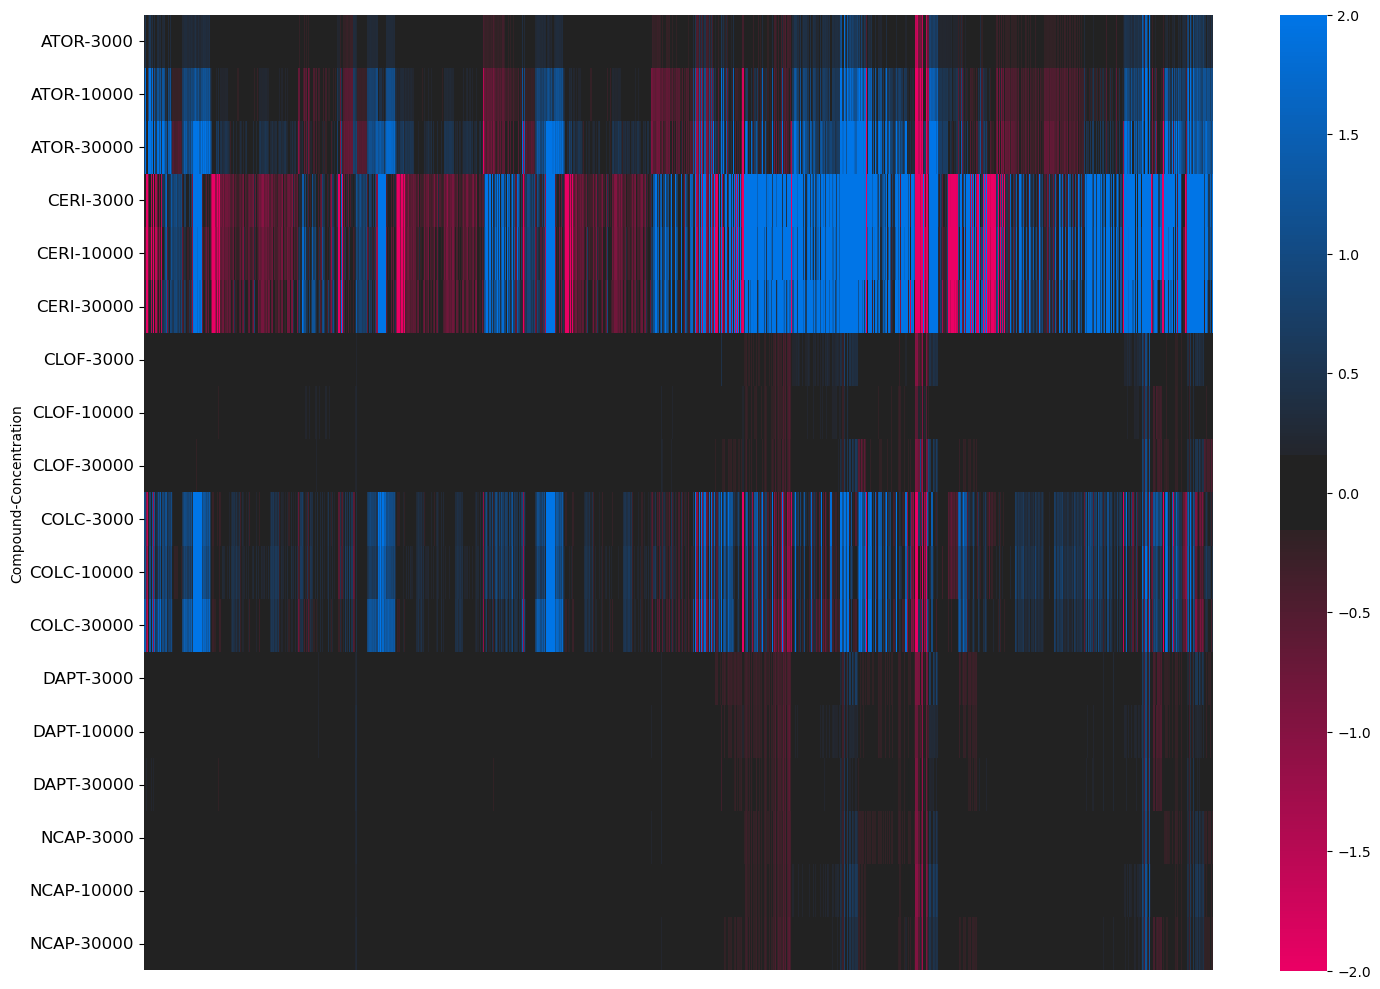

In [4]:
subdf = df#[cyto_cols]
subdf.reset_index(inplace=True)
subdf = subdf.loc[subdf['Concentration'] >= 3000]
subdf.set_index(['Compound', 'Concentration'], inplace=True)
plt.figure(figsize = (15,10))
ax = sns.heatmap(subdf , cmap=cmap,xticklabels=False, yticklabels=1, cbar=True,center=0, vmin=-2, vmax=2)
ax.tick_params(labelsize=12)
#ax.vlines([8,16,24,32,40], ymin=0, ymax=len(df.T), color='white')

plt.tight_layout()
plt.show()